# Machine Learning in Healthcare

## Diabetes Classification

Given two data-sets, one with features that can affect and/or cause diabetes and the other with labels 0 and 1 stating if the person is Diabetic or not.

### (A) Imorting relevant libraries :

    1. Pandas & NumPy for analysing data
    
    2. MatplotLib for data-visualisation
    
    3. SkLearn to compute results (classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 

### (B) Analysing data
First we load data from csv files into data-frames using Pandas.

Of the given data-files, we import input features onto the **X_train** data-frame.

In [2]:
X_train = pd.read_csv("Diabetes_XTrain.csv", index_col=None)

In [3]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


Similarly, the csv file containing labels (0 for Diabetic and 1 for Non-Diabetic) is loaded onto the **y** data-frame.

In [4]:
y = pd.read_csv("Diabetes_YTrain.csv",index_col=None)

In [5]:
y.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [6]:
y.shape

(576, 1)

In [7]:
y_train = y.values

Reshaping y into a vector to fit the model

In [8]:
y_train = y_train.reshape(-1,)
y_train.shape

(576,)

Lastly, we import the data on which we need to predict the labels : **X_test**

In [9]:
X_test = pd.read_csv("Diabetes_XTest.csv", index_col=None)

In [10]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


### (3) Visualising data
Here, I create an array to return counts of each class in the **y_train** data-frame.

And then plot it using bar-graph to better understand the labels and their count. 

In [11]:
labels = np.unique(y_train, return_counts=True)
labels

(array([0, 1]), array([375, 201]))

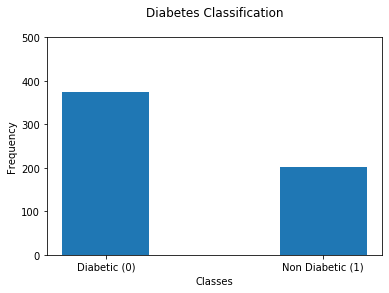

In [12]:
plt.bar([labels[0][0],labels[0][1]],[labels[1][0],labels[1][1]], width=0.4,tick_label =["Diabetic (0)", "Non Diabetic (1)"])

plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Diabetes Classification\n")
plt.ylim(0,500)

plt.show()

### (D) Training phase
Now, we deploy K-Nearest Neighbour, a *machine learning algortihm* to learn from **X_train** and **y_train**.

In [13]:
model = KNeighborsClassifier(3)

In [14]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### (E) Testing phase
In the last cell, we deployed KNN with the value of K set to 3 on the training data.

Now we use the same model to predict labels of our test data-set i.e. the **X_test**

In [15]:
prediction = model.predict(X_test)

In [16]:
y_test = pd.DataFrame(prediction, columns=["Outcome"])

In [17]:
y_test

,Outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,1
188,0
189,1
190,0


In [18]:
y_test.to_csv("Diabetes_Prediction.csv", index=None)